## 대구 교통사고 피해 예측 AI 경진대회 
### https://dacon.io/competitions/official/236193/overview/description

## 데이터 불러오기 

In [56]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed) #seed 고정 
    np.random.seed(seed)

seed_everything(42)

In [57]:
train_org = pd.read_csv('C:/Users/admin/Downloads/open/open/train.csv') 
test_org = pd.read_csv('C:/Users/admin/Downloads/open/open/test.csv')

display(train_org.head())
display(test_org.tail())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
10958,ACCIDENT_50567,2022-12-31 18,토요일,맑음,대구광역시 남구 대명동,단일로 - 터널,건조,차대차
10959,ACCIDENT_50568,2022-12-31 18,토요일,맑음,대구광역시 수성구 시지동,단일로 - 기타,건조,차대차
10960,ACCIDENT_50569,2022-12-31 20,토요일,맑음,대구광역시 수성구 연호동,단일로 - 기타,건조,차대차
10961,ACCIDENT_50570,2022-12-31 20,토요일,맑음,대구광역시 수성구 범물동,교차로 - 교차로부근,건조,차대차
10962,ACCIDENT_50571,2022-12-31 21,토요일,맑음,대구광역시 동구 효목동,교차로 - 교차로부근,건조,차대차


In [58]:
#제출 데이터 확인
sample_submission = pd.read_csv("C:/Users/admin/Downloads/open/open/sample_submission.csv")
sample_submission.head()

,ID,ECLO
0,ACCIDENT_39609,0
1,ACCIDENT_39610,0
2,ACCIDENT_39611,0
3,ACCIDENT_39612,0
4,ACCIDENT_39613,0


In [59]:
train_d = train_org.copy() 
test_d = test_org.copy()

# 전처리 및 EDA

#### 가해운전자 연령 numeric 전환 / null값,미분류값 -> 결측값 대체/ '-세 이상' 제거 

In [60]:
import numpy as np
import pandas as pd

def age_process(age):
    if pd.isnull(age) or age == '미분류':
        return np.nan
    elif age == '90세 이상':
        return 90
    elif age == '98세 이상':
        return 98
    else:
        return int(age.replace('세', ''))

In [61]:
train_d['가해운전자 연령'] = train_d['가해운전자 연령'].apply(age_process)

##### 법적인 운전가능 나이만 추출해서 scoring 했지만 낮은 성능 보임, 주석처리함
##### 상식적인(?) 피해운전자 연령 2세 이하 제거했으나 낮은 성능 보임
##### 가장높은 eclo 수치 (outlier처럼 보이는) 제거하면 성능 안좋아짐
##### 결론 : 가해운전자 연령 10세 미만 '만' 제거 

In [62]:
#train_d = train_d[~((train_d['가해운전자 차종'] =='이륜') & (train_d['가해운전자 연령'] <16))]
#train_d = train_d[~((train_d['가해운전자 차종'] =='원동기') & (train_d['가해운전자 연령'] <16))]
#train_d = train_d[~(train_d['가해운전자 차종'] =='기타불명')]
#train_d = train_d[train_d['가해운전자 연령'].notna()]
#train_d = train_d[~((train_d['가해운전자 차종'] =='화물') & (train_d['가해운전자 연령'] <21))]
#train_d = train_d[~((train_d['가해운전자 차종'] =='원동기') & (train_d['가해운전자 연령'] <16))]
#train_d = train_d[~(train_d['가해운전자 연령']<8)]
#train_d = train_d[train_d['가해운전자 연령'] <98]
#train_d = train_d[train_d['가해운전자 연령'] >10]
#train_d = train_d[~(train_d['피해운전자 연령']<=2)]
#train_d = train_d[~((train_d['가해운전자 상해정도']=='기타불명') |(train_d['피해운전자 상해정도']=='기타불명')) ]
#train_d = train_d[train_d['ECLO']<70]

In [63]:
train_d = train_d[train_d['가해운전자 연령']>=10]

In [64]:
len(train_d)

38585

In [65]:
train_df = train_d.copy()
test_df = test_d.copy()

In [66]:
train_df = train_df[test_df.columns.tolist()] #test 데이터와 컬럼 일치
train_df = pd.concat([train_df,train_d['ECLO']],axis=1)
train_df.head() 

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,3


###### 시군구 -> 정규표현식으로 도시/구/동 세 컬럼으로 분할

In [67]:
# 시군구로 나누는 정규표현식
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

###### 도로형태 -> 정규표현식으로 도로형태1 도로형태2 두개 컬럼으로 분할

In [68]:
# 도로형태로 나누는 정규표현식
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '사고일시', '요일', '기상상태', '노면상태', '사고유형', 'ECLO', '도시', '구', '동',\n       '도로형태1', '도로형태2'],\n      dtype='object')"

"columns of test_df : Index(['ID', '사고일시', '요일', '기상상태', '노면상태', '사고유형', '도시', '구', '동', '도로형태1',\n       '도로형태2'],\n      dtype='object')"

###### 사고일시 year/ month/day/hour 네개 컬럼으로 분할 및 datetime 전환

In [69]:
#사고일시 컬럼 datetime 변환 
train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])
test_df['사고일시'] = pd.to_datetime(test_df['사고일시'])

In [70]:
#year,month,day,hour 변환
train_df['year'] = train_df['사고일시'].apply(lambda x : x.year)
train_df['month'] = train_df['사고일시'].apply(lambda x : x.month)
train_df['day'] = train_df['사고일시'].apply(lambda x : x.day)
train_df['hour'] = train_df['사고일시'].apply(lambda x : x.hour)

In [71]:
test_df['year'] = test_df['사고일시'].apply(lambda x : x.year)
test_df['month'] = test_df['사고일시'].apply(lambda x : x.month)
test_df['day'] = test_df['사고일시'].apply(lambda x : x.day)
test_df['hour'] = test_df['사고일시'].apply(lambda x : x.hour)

## 구별 분포 확인

In [80]:
import matplotlib
%matplotlib inline 


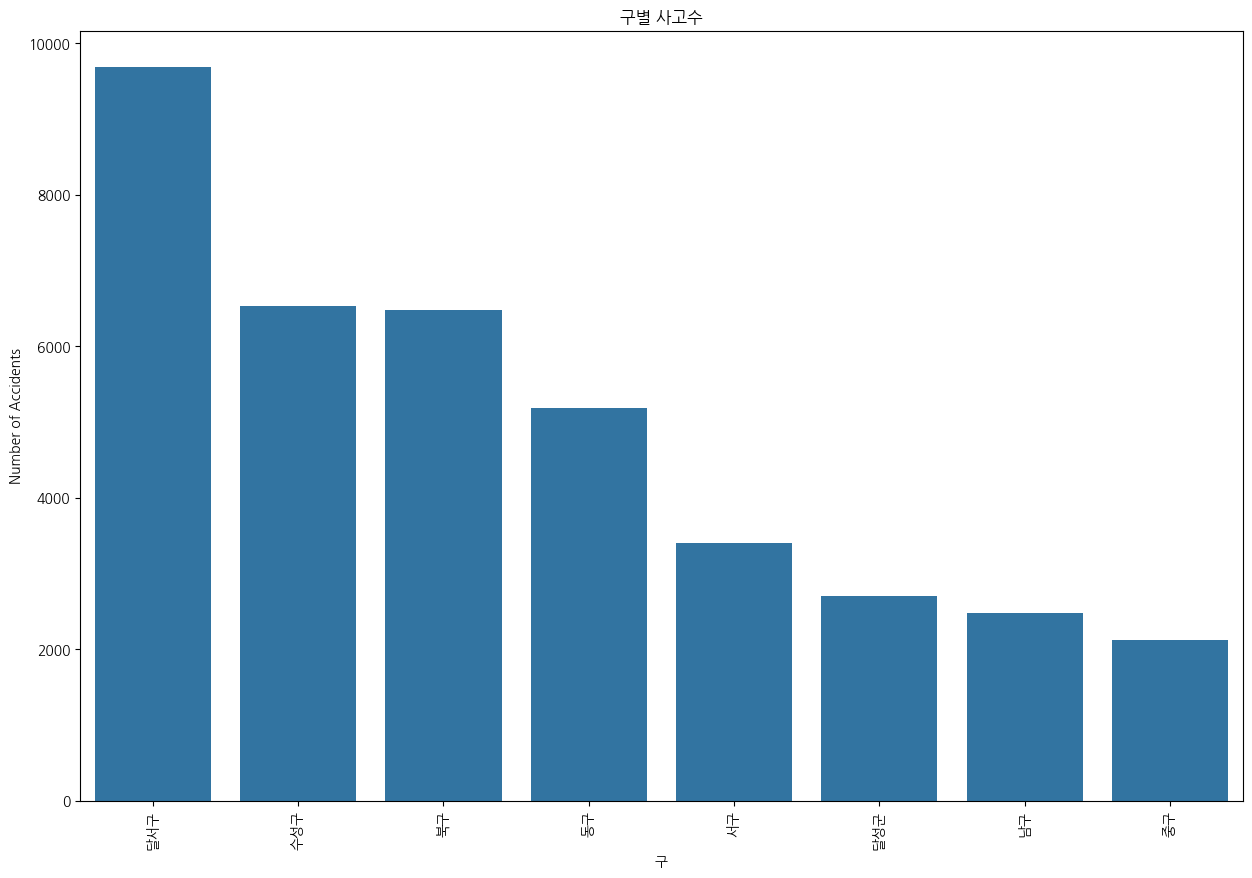

In [81]:

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "C:/Users/admin/anaconda3/envs/py39/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf"

# 폰트 프로퍼티를 설정합니다.
font_prop = fm.FontProperties(fname=font_path).get_name()

# Matplotlib의 rcParams를 통해 전역 폰트를 설정합니다.
plt.rcParams["font.family"] = font_prop

# 시군구별 교통사고 수 계산하기
accidents_by_Gu = train_df['구'].value_counts() 

# 시각화하기
plt.figure(figsize=(15,10))
sns.barplot(x=accidents_by_Gu.index, y=accidents_by_Gu.values)
plt.xlabel('구')
plt.ylabel('Number of Accidents')
plt.title('구별 사고수')
plt.xticks(rotation=90)  # x축 레이블을 90도 회전시킵니다. 이는 레이블이 길 경우 겹치지 않게 하기 위함입니다.
plt.show()

동
others    12826
대명동        1698
범어동        1141
상인동        1108
비산동         942
내당동         917
만촌동         884
산격동         856
평리동         855
신암동         795
송현동         788
다사읍         768
신천동         753
태전동         685
용산동         678
감삼동         668
침산동         656
신당동         622
이곡동         620
두류동         612
봉덕동         608
월성동         606
진천동         600
두산동         585
효목동         577
황금동         573
화원읍         545
지산동         484
성당동         437
동천동         429
복현동         404
본리동         403
율하동         395
읍내동         392
신매동         361
현풍읍         354
본동          340
구암동         334
방촌동         333
상동          331
서변동         316
남산동         306
Name: count, dtype: int64


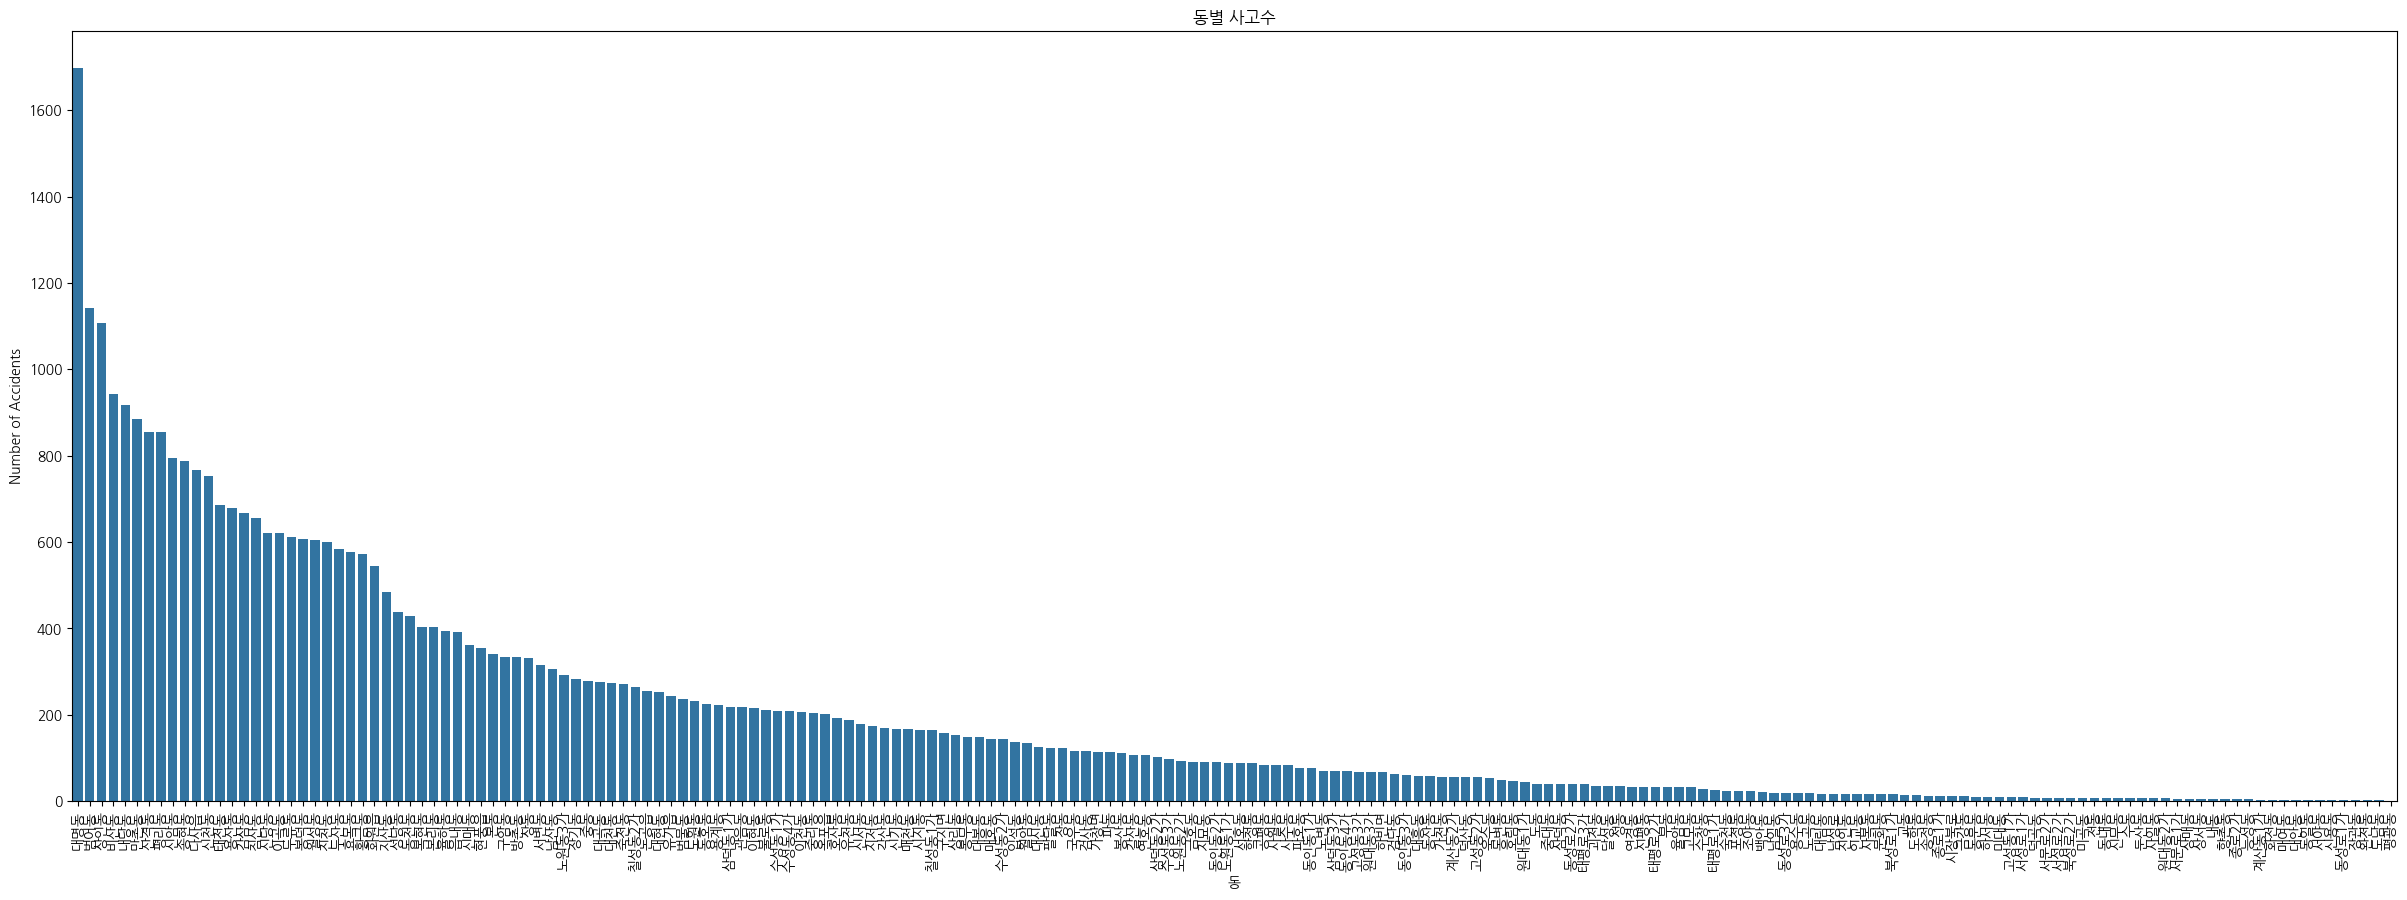

In [82]:
# 시군구별 교통사고 수 계산하기
train_df2 = train_df.copy()
accidents_by_dong = train_df2['동'].value_counts() 

# 사고수가 50개 이하인 동을 'others'로 통합하기
train_df2['동'] = train_df2['동'].map(lambda x: 'others' if accidents_by_dong[x] <= 300 else x)

# 결과 확인하기
print(train_df2['동'].value_counts())


# 시각화하기
plt.figure(figsize=(30,10))
sns.barplot(x=accidents_by_dong.index, y=accidents_by_dong.values)
plt.xlabel('동')
plt.ylabel('Number of Accidents')
plt.title('동별 사고수')
plt.xticks(rotation=90)  # x축 레이블을 90도 회전시킵니다. 이는 레이블이 길 경우 겹치지 않게 하기 위함입니다.
plt.show()

기상상태
맑음    36181
비      2627
흐림      729
기타       56
안개        8
눈         8
Name: count, dtype: int64


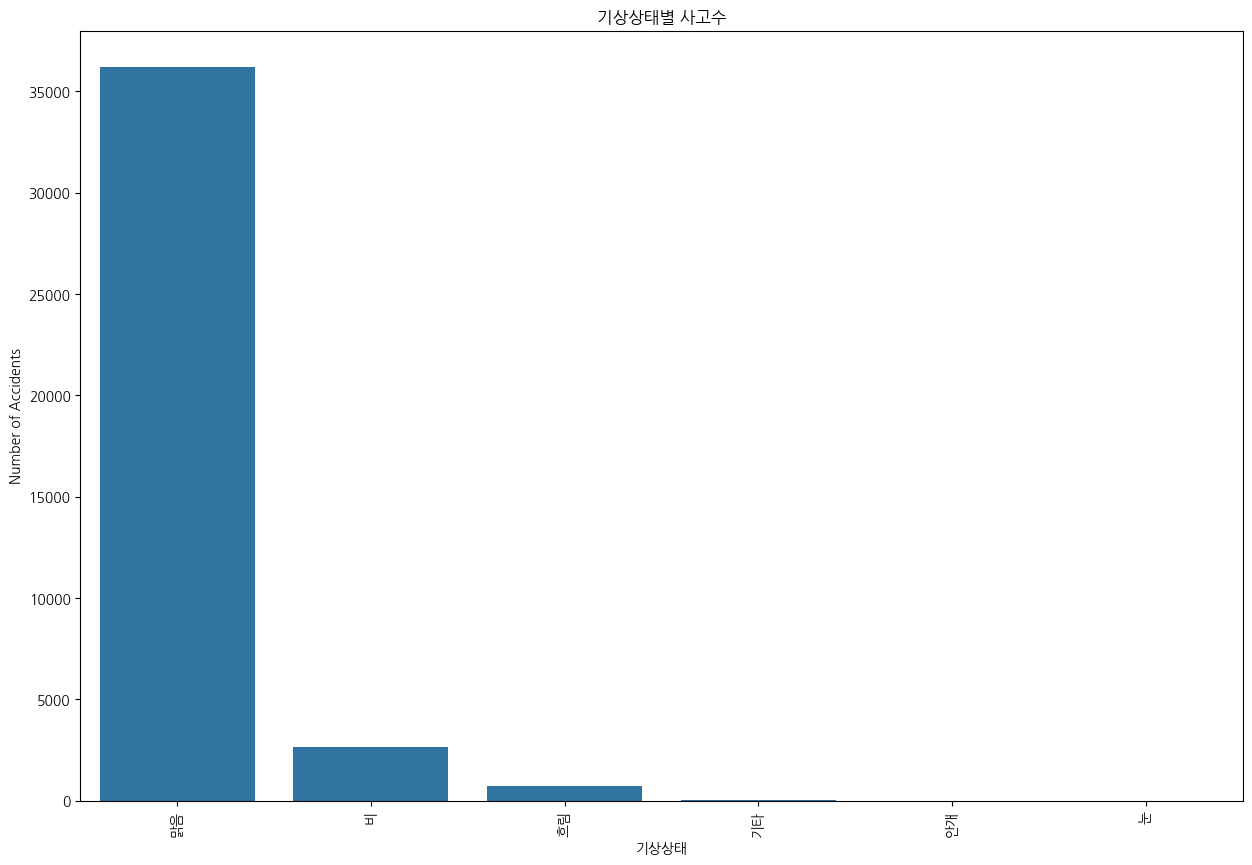

In [83]:
accidents_weather = train_org['기상상태'].value_counts() 
print(accidents_weather)
plt.figure(figsize=(15,10))
sns.barplot(x=accidents_weather.index, y=accidents_weather.values)
plt.xlabel('기상상태')
plt.ylabel('Number of Accidents')
plt.title('기상상태별 사고수')
plt.xticks(rotation=90)  # x축 레이블을 90도 회전시킵니다. 이는 레이블이 길 경우 겹치지 않게 하기 위함입니다.
plt.show()

###### 범주형 변수 컬럼 갯수 확인

In [52]:
# 범주형 변수 갯수확인해주기 -> 기상상태, 동의 nunique 갯수가 다름
col_list = train_df.select_dtypes(include='object').columns.tolist()
for col in col_list:
    print("Column Name:", col)
    print("Train Unique Count:", train_df[col].nunique()) 
    print("Test Unique Count:", test_df[col].nunique())

Column Name: ID
Train Unique Count: 38585
Test Unique Count: 10963
Column Name: 요일
Train Unique Count: 7
Test Unique Count: 7
Column Name: 기상상태
Train Unique Count: 6
Test Unique Count: 5
Column Name: 노면상태
Train Unique Count: 6
Test Unique Count: 6
Column Name: 사고유형
Train Unique Count: 3
Test Unique Count: 3
Column Name: 도시
Train Unique Count: 1
Test Unique Count: 1
Column Name: 구
Train Unique Count: 8
Test Unique Count: 8
Column Name: 동
Train Unique Count: 196
Test Unique Count: 190
Column Name: 도로형태1
Train Unique Count: 5
Test Unique Count: 5
Column Name: 도로형태2
Train Unique Count: 10
Test Unique Count: 10


###### 기상상태/동과 컬럼 갯수 상이함 

In [53]:
train_unique = set(train_df['동'].unique())
test_unique = set(test_df['동'].unique())

# 테스트 데이터셋에만 있는 범주를 찾습니다.
only_in_test = test_unique - train_unique
print('Only in test:', only_in_test)

# 훈련 데이터셋에만 있는 범주를 찾습니다.
only_in_train = train_unique - test_unique
print('Only in train:', only_in_train)

Only in test: set()
Only in train: {'신무동', '둔산동', '장관동', '내동', '도남동', '서야동'}


In [54]:
train_unique = set(train_df['기상상태'].unique())
test_unique = set(test_df['기상상태'].unique())

# 테스트 데이터셋에만 있는 범주를 찾습니다.
only_in_test = test_unique - train_unique
print('Only in test:', only_in_test)

# 훈련 데이터셋에만 있는 범주를 찾습니다.
only_in_train = train_unique - test_unique
print('Only in train:', only_in_train)

Only in test: set()
Only in train: {'안개'}


##### train 없는 범주들 결측값 대체 후 최빈값 대체

In [15]:
# 없는 범주들 nan처리 
not_col = ['서야동', '둔산동', '도남동', '내동', '장관동', '신무동']
for col in not_col:
    train_df['동'] = np.where(train_df['동']== col, np.nan, train_df['동'])
train_df['기상상태'] = np.where(train_df['기상상태']== '안개', np.nan, train_df['기상상태'])

In [16]:
# '동' 열에서 결측값을 최빈값으로 대체
mode = train_df['동'].mode()[0]
train_df['동'] = train_df['동'].fillna(mode)

# '기상상황' 열에서 결측값을 최빈값으로 대체
mode = train_df['기상상태'].mode()[0]
train_df['기상상태'] = train_df['기상상태'].fillna(mode)

# 라벨링 및 파생변수 생성

##### 출퇴근시간 (rush hour)/ 차량이 비교적 적은 낮시간 파생변수 생성

In [17]:
#출퇴근시간 라벨
def label_hour(hour):
    if 5 <= hour < 11:
        return '출근시간'
    elif 11 <= hour < 17:
        return '낮시간'
    elif 17 <= hour < 23:
        return '퇴근시간'
    else: 
        return '새벽시간'
train_df['rush'] = train_df['hour'].apply(label_hour)
test_df['rush'] = test_df['hour'].apply(label_hour)
train_df.head()

,ID,사고일시,요일,기상상태,노면상태,사고유형,ECLO,도시,구,동,도로형태1,도로형태2,year,month,day,hour,rush
0,ACCIDENT_00000,2019-01-01 00:00:00,화요일,맑음,건조,차대사람,5,대구광역시,중구,대신동,단일로,기타,2019,1,1,0,새벽시간
1,ACCIDENT_00001,2019-01-01 00:00:00,화요일,흐림,건조,차대사람,3,대구광역시,달서구,감삼동,단일로,기타,2019,1,1,0,새벽시간
2,ACCIDENT_00002,2019-01-01 01:00:00,화요일,맑음,건조,차대사람,3,대구광역시,수성구,두산동,단일로,기타,2019,1,1,1,새벽시간
3,ACCIDENT_00003,2019-01-01 02:00:00,화요일,맑음,건조,차대차,5,대구광역시,북구,복현동,단일로,기타,2019,1,1,2,새벽시간
4,ACCIDENT_00004,2019-01-01 04:00:00,화요일,맑음,건조,차대차,3,대구광역시,동구,신암동,단일로,기타,2019,1,1,4,새벽시간


#### 주말+ 빨간날(대체공휴일 포함) ->휴일/ 아닌날은 평일로 라벨링

In [18]:
#국가지정 대체공휴일 포함
hol_2019 = ['2019-01-01', '2019-02-04', '2019-02-05', '2019-02-06', '2019-03-01', '2019-05-06', '2019-06-06', '2019-08-15', '2019-09-12', '2019-09-13', '2019-10-03', '2019-10-09', '2019-12-25']
hol_2020= ['2020-01-01', '2020-01-24', '2020-01-27', '2020-05-05', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-09', '2020-12-25']
hol_2021 = ['2021-01-01','2021-02-11','2021-02-12','2021-03-01','2021-05-05','2021-05-19','2021-08-16','2021-09-20','2021-09-21','2021-09-22','2021-10-04','2021-10-11']

def label_weekday(date):
    if date.weekday() >= 5 or date.strftime('%Y-%m-%d') in hol_2019 or date.strftime('%Y-%m-%d') in hol_2020 or date.strftime('%Y-%m-%d') in hol_2021:  # 토요일과 일요일
        return '휴일'
    else:
        return '평일'

train_df['휴일여부'] = train_df['사고일시'].apply(label_weekday)
test_df['휴일여부'] = test_df['사고일시'].apply(label_weekday)
train_df.head()

,ID,사고일시,요일,기상상태,노면상태,사고유형,ECLO,도시,구,동,도로형태1,도로형태2,year,month,day,hour,rush,휴일여부
0,ACCIDENT_00000,2019-01-01 00:00:00,화요일,맑음,건조,차대사람,5,대구광역시,중구,대신동,단일로,기타,2019,1,1,0,새벽시간,휴일
1,ACCIDENT_00001,2019-01-01 00:00:00,화요일,흐림,건조,차대사람,3,대구광역시,달서구,감삼동,단일로,기타,2019,1,1,0,새벽시간,휴일
2,ACCIDENT_00002,2019-01-01 01:00:00,화요일,맑음,건조,차대사람,3,대구광역시,수성구,두산동,단일로,기타,2019,1,1,1,새벽시간,휴일
3,ACCIDENT_00003,2019-01-01 02:00:00,화요일,맑음,건조,차대차,5,대구광역시,북구,복현동,단일로,기타,2019,1,1,2,새벽시간,휴일
4,ACCIDENT_00004,2019-01-01 04:00:00,화요일,맑음,건조,차대차,3,대구광역시,동구,신암동,단일로,기타,2019,1,1,4,새벽시간,휴일


#### 계절변수 추가 

In [19]:
## 계절변수 추가
## 봄 3,4,5월/ 여름 678월/ 가을 9 10 11/ 겨울12 1 2 
conditions = [
    (train_df['month'].isin([3, 4, 5])),
    (train_df['month'].isin([6, 7, 8])),
    (train_df['month'].isin([9, 10, 11])),
    (train_df['month'].isin([12, 1, 2]))
]
conditions1 = [
    (test_df['month'].isin([3, 4, 5])),
    (test_df['month'].isin([6, 7, 8])),
    (test_df['month'].isin([9, 10, 11])),
    (test_df['month'].isin([12, 1, 2]))
]
choices = ['봄', '여름', '가을', '겨울']

train_df['season'] = np.select(conditions, choices, default=np.nan)
test_df['season'] = np.select(conditions1, choices, default=np.nan)

In [20]:
train_df.head()

,ID,사고일시,요일,기상상태,노면상태,사고유형,ECLO,도시,구,동,도로형태1,도로형태2,year,month,day,hour,rush,휴일여부,season
0,ACCIDENT_00000,2019-01-01 00:00:00,화요일,맑음,건조,차대사람,5,대구광역시,중구,대신동,단일로,기타,2019,1,1,0,새벽시간,휴일,겨울
1,ACCIDENT_00001,2019-01-01 00:00:00,화요일,흐림,건조,차대사람,3,대구광역시,달서구,감삼동,단일로,기타,2019,1,1,0,새벽시간,휴일,겨울
2,ACCIDENT_00002,2019-01-01 01:00:00,화요일,맑음,건조,차대사람,3,대구광역시,수성구,두산동,단일로,기타,2019,1,1,1,새벽시간,휴일,겨울
3,ACCIDENT_00003,2019-01-01 02:00:00,화요일,맑음,건조,차대차,5,대구광역시,북구,복현동,단일로,기타,2019,1,1,2,새벽시간,휴일,겨울
4,ACCIDENT_00004,2019-01-01 04:00:00,화요일,맑음,건조,차대차,3,대구광역시,동구,신암동,단일로,기타,2019,1,1,4,새벽시간,휴일,겨울


In [21]:
train_df.isnull().sum()

ID        0
사고일시      0
요일        0
기상상태      0
노면상태      0
사고유형      0
ECLO      0
도시        0
구         0
동         0
도로형태1     0
도로형태2     0
year      0
month     0
day       0
hour      0
rush      0
휴일여부      0
season    0
dtype: int64

## 외부데이터 결합

#### 대구 주차장 데이터 정보 결합 급지구분에 대해 groupby하여 동별 급지구분 갯수 나타냄

In [78]:
parking_df = pd.read_csv("C:/Users/admin/Downloads/open/open/external_open/대구 주차장 정보.csv", encoding='cp949')[['소재지지번주소', '급지구분']]
parking_df.head()

,소재지지번주소,급지구분
0,대구광역시 남구 봉덕동 1002-69,1
1,대구광역시 남구 봉덕동 687-8,1
2,대구광역시 남구 대명동 1803-10,1
3,대구광역시 남구 봉덕동 1256,2
4,대구광역시 남구 봉덕동 976-5,1


In [22]:
parking_df = pd.get_dummies(parking_df, columns=['급지구분'])
location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

parking_df[['도시', '구', '동', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)
parking_df = parking_df.drop(columns=['소재지지번주소', '번지'])
parking_df = parking_df.groupby(['도시', '구', '동']).sum().reset_index()
parking_df.reset_index(inplace=True, drop=True)
parking_df.head()

,도시,구,동,급지구분_1,급지구분_2,급지구분_3
0,대구광역시,남구,대명동,20,1,0
1,대구광역시,남구,봉덕동,9,3,0
2,대구광역시,남구,이천동,3,0,0
3,대구광역시,달서구,갈산동,0,0,4
4,대구광역시,달서구,감삼동,0,1,3


In [23]:
tr_pk = pd.merge(train_df,parking_df, on=['도시','구','동'],how='left')
ts_pk = pd.merge(test_df,parking_df, on=['도시','구','동'],how='left')
tr_pk = tr_pk.fillna(0)
ts_pk = ts_pk.fillna(0)

In [24]:
tr_pk.head()

,ID,사고일시,요일,기상상태,노면상태,사고유형,ECLO,도시,구,동,도로형태1,도로형태2,year,month,day,hour,rush,휴일여부,season,급지구분_1,급지구분_2,급지구분_3
0,ACCIDENT_00000,2019-01-01 00:00:00,화요일,맑음,건조,차대사람,5,대구광역시,중구,대신동,단일로,기타,2019,1,1,0,새벽시간,휴일,겨울,11.0,0.0,0.0
1,ACCIDENT_00001,2019-01-01 00:00:00,화요일,흐림,건조,차대사람,3,대구광역시,달서구,감삼동,단일로,기타,2019,1,1,0,새벽시간,휴일,겨울,0.0,1.0,3.0
2,ACCIDENT_00002,2019-01-01 01:00:00,화요일,맑음,건조,차대사람,3,대구광역시,수성구,두산동,단일로,기타,2019,1,1,1,새벽시간,휴일,겨울,0.0,0.0,0.0
3,ACCIDENT_00003,2019-01-01 02:00:00,화요일,맑음,건조,차대차,5,대구광역시,북구,복현동,단일로,기타,2019,1,1,2,새벽시간,휴일,겨울,0.0,9.0,5.0
4,ACCIDENT_00004,2019-01-01 04:00:00,화요일,맑음,건조,차대차,3,대구광역시,동구,신암동,단일로,기타,2019,1,1,4,새벽시간,휴일,겨울,0.0,1.0,0.0


## 모델링

In [84]:
train =tr_pk.copy()
test = ts_pk.copy()

In [87]:
#다중공선성 확인 -> 
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 데이터프레임에서 특성만 선택
X = train.drop('ECLO',axis=1)
X = X.select_dtypes(exclude=['object'])
# VIF 데이터프레임
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# VIF 계산
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [25]:
train =tr_pk.copy()
test = ts_pk.copy()
train = train.drop(['ID','도시','사고일시','year'],axis=1)
test = test.drop(['ID','도시','사고일시','year'],axis=1)

#### 범주형 변수 라벨인코딩

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

col_list = train.select_dtypes(include='object').columns.tolist()

for col in col_list:
    encoder.fit(train[col].values)
    
    train[col] = encoder.fit_transform(train[col].values)
    test[col] = encoder.transform(test[col].values)

#### train test 분리

In [27]:
from sklearn.model_selection import train_test_split
y = train.pop('ECLO')
X = train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### autoML 모델링, 시간은 40분으로 설정

In [28]:
from supervised.automl import AutoML
automl = AutoML(mode="Compete",
                algorithms = [ 'Random Forest', 'LightGBM', 'Xgboost'], 
                n_jobs = -1,total_time_limit=2400, eval_metric="rmse", ml_task = "regression")

In [29]:
automl.fit(X_train, y_train)

AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree rmse 3.032755 trained in 0.28 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 3 models
1_Default_LightGBM rmse 3.257398 trained in 6.23 seconds
2_Default_Xgboost rmse 3.255132 trained in 4.2 seconds
3_Default_RandomForest rmse 3.261499 trained in 10.28 seconds
* Step not_so_random will

C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: Fut

9_Xgboost_KMeansFeatures rmse 3.259003 trained in 20.96 seconds


C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: Fut

21_LightGBM_KMeansFeatures rmse 3.25649 trained in 23.62 seconds


C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: Fut

13_LightGBM_KMeansFeatures rmse 3.257599 trained in 23.59 seconds
* Step insert_random_feature will try to check up to 1 model
9_Xgboost_RandomFeature rmse 3.252529 trained in 15.78 seconds


C:\Users\admin\anaconda3\envs\py39\lib\site-packages\supervised\utils\additional_metrics.py:701: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\supervised\utils\additional_metrics.py:701: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\supervised\utils\additional_metrics.py:701: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\supervised\utils\additional_metrics.py:701: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\supervised\utils\additional_metrics.py:701: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
C:\Users\admin\anaconda3\envs\py39\lib\site-packages\supervised\utils\additional_metrics.py:701: UserWarning: Glyph 47196 (\N{

Drop features ['노면상태', '기상상태', 'random_feature', 'season', 'rush', 'day']
* Step features_selection will try to check up to 3 models
9_Xgboost_SelectedFeatures rmse 3.250622 trained in 12.45 seconds
13_LightGBM_GoldenFeatures_SelectedFeatures rmse 3.252666 trained in 13.51 seconds
26_RandomForest_SelectedFeatures rmse 3.255226 trained in 22.83 seconds
* Step hill_climbing_1 will try to check up to 16 models
31_Xgboost_SelectedFeatures rmse 3.250569 trained in 6.3 seconds
32_Xgboost_SelectedFeatures rmse 3.250738 trained in 5.83 seconds
33_Xgboost rmse 3.250424 trained in 6.41 seconds
34_Xgboost rmse 3.251188 trained in 6.1 seconds
35_Xgboost_GoldenFeatures rmse 3.251856 trained in 6.28 seconds
36_Xgboost_GoldenFeatures rmse 3.251448 trained in 6.49 seconds
37_LightGBM_GoldenFeatures_SelectedFeatures rmse 3.251614 trained in 7.35 seconds
38_LightGBM_GoldenFeatures rmse 3.253314 trained in 7.07 seconds
39_LightGBM rmse 3.253971 trained in 6.67 seconds
40_LightGBM rmse 3.253251 trained in

AutoML(algorithms=['Random Forest', 'LightGBM', 'Xgboost'], eval_metric='rmse',
       ml_task='regression', mode='Compete', total_time_limit=2400)

# 제출

In [31]:
pred = automl.predict(test)

In [32]:
sample_submission = pd.read_csv("C:/Users/admin/Downloads/open/open/sample_submission.csv")
sample_submission['ECLO'] = pred
sample_submission.head()

,ID,ECLO
0,ACCIDENT_39609,3.777165
1,ACCIDENT_39610,3.547533
2,ACCIDENT_39611,4.844037
3,ACCIDENT_39612,4.493802
4,ACCIDENT_39613,4.508956


In [33]:
sample_submission.to_csv('C:/Users/admin/Downloads/open/open/baseline_submit_final.csv', index=False)